# Project 3a: Hough Transform 

The purpose of this project is to acquaint you with the fundamental techniques behind two fundamental feature detection algorithms in Computer Vision: the Hough Transform and the Canny Filter.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from project3 import *


# Part 1: Sobel Edge Detector


Congratulations!  You've unlocked the cv2.filter2d() method, which will replace the (non-linearly separable) filtering algorithms you created in Project 2.

Use it to implement a Sobel Edge detector.  As described in the textbook, the Sobel kernel finds oriented edges.    The kernel for finding vertical edges is:

$$ G_{x} = \begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$$

and the kernel for finding horizontal edges is:

$$ G_{y} = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ +1 & +2 & +1 \end{bmatrix}$$

Using filter2d, run each of these kernels separately over some greyscale images, and show the results below.   How are the x and y gradients different?

Hint: I recommend *first* running a slight gaussian blur over an image to remove the worst high frequency noise.




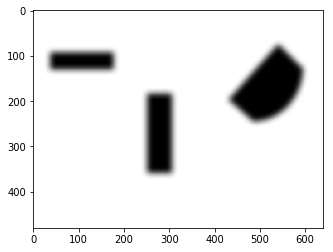

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


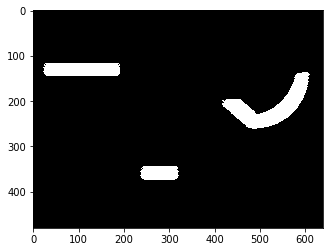

<Figure size 216x216 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


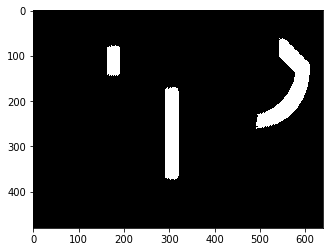

<Figure size 216x216 with 0 Axes>

In [2]:
monkey = cv2.imread("../images/project3/demo.pgm")
horz = cv2.imread("../images/project3/horz.pgm")
vert = cv2.imread("../images/project3/vert.pgm")
dots = cv2.imread("../images/project3/four-horiz-dots.pgm")
test_image = cv2.imread("../images/project3/testimage.pgm")

gaussian_blur_monkey = Gaussian_Blur(monkey)
gaussian_blur_horz = Gaussian_Blur(horz)
gaussian_blur_vert = Gaussian_Blur(vert)
gaussian_blur_test_image = Gaussian_Blur(test_image)

sobel_edge_monkey = Sobel_Edge(gaussian_blur_monkey)

# Running each kernel separately over the test image

plt.imshow(gaussian_blur_test_image)
plt.show()

sobel_edge_vert = Sobel_Edge_Vert(gaussian_blur_test_image)
sobel_edge_horz = Sobel_Edge_Horz(gaussian_blur_test_image)

plt.imshow(sobel_edge_vert)
plt.figure(figsize=(3,3))
plt.show()

plt.imshow(sobel_edge_horz)
plt.figure(figsize=(3,3))
plt.show()

#TESTING CODE HERE

Of course, we're really presently only interested in the magnitude, not the orientation of edges (although that'll change soon), so we can use the following formula:

$G = \sqrt{G_{x}^{2} + G_{y}^{2}}$

In the cell below, show results of calculating the edge magnitude of the images you tested above

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


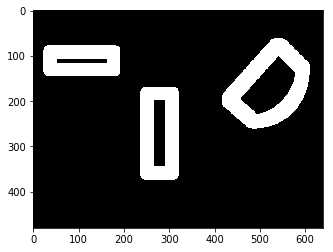

<Figure size 216x216 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


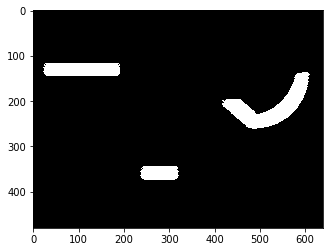

<Figure size 216x216 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


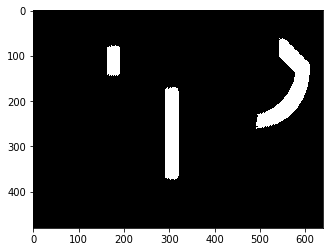

<Figure size 216x216 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


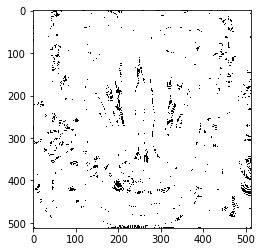

<Figure size 216x216 with 0 Axes>

In [3]:
# Results of the magnitude:
test_image = cv2.imread("../images/project3/testimage.pgm")
gaussian_blur_test_image = Gaussian_Blur(test_image)
sobel_edge_test_image = Sobel_Edge(gaussian_blur_test_image)

plt.imshow(sobel_edge_test_image)
plt.figure(figsize=(3,3))
plt.show()

# Showing the magnitude using other images

plt.imshow(sobel_edge_vert)
plt.figure(figsize=(3,3))
plt.show()

plt.imshow(sobel_edge_horz)
plt.figure(figsize=(3,3))
plt.show()

plt.imshow(sobel_edge_monkey)
plt.figure(figsize=(3,3))
plt.show()



# Part 2: Hough Transform

Following Tuesday's lecture, recall that the Hough Transform is a way to find the predominant lines in an image (generally, a de-noised and edge-detected image).  It all revolves around using the equation:

$\rho = x*cos(\theta) + y*sin(\theta)$

to define a line.

Let's begin by "discretizing" our $\theta$ (angle) values into ten discrete values:


In [4]:
thetaVals = np.linspace(0,math.pi,9) #8 vals between 0 and pi


Then we can define a bunch of arbitrary points:

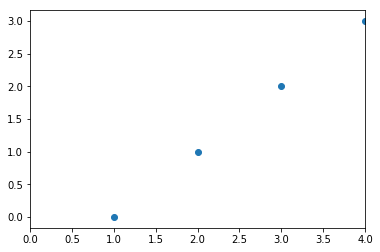

In [5]:
pt0 = (1,0)
pt1 = (2,1)
pt2 = (3,2)
pt3 = (4,3)
pts = [pt0,pt1,pt2,pt3]

xs = [p[0] for p in pts]
ys = [p[1] for p in pts]

plt.xlim(0,4)
plt.scatter(xs,ys)


Here's what we get for sweeping through the theta values described above, and finding each corresponding $\rho$ value:

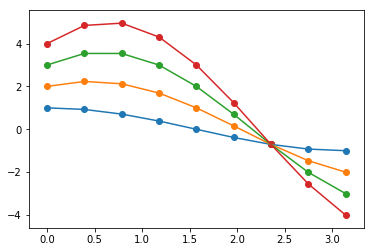

In [6]:
rhoVals = []
for p in pts:
    rhoVals = []
    for t in thetaVals:
        rhoVals.append(p[0]*math.cos(t) + p[1]*math.sin(t)) # applying the equation
    #print(rhoVals)
    plot = plt.plot(thetaVals,rhoVals) 
    plot = plt.scatter(thetaVals,rhoVals) 
    

Notice that each point's $\rho$ values form a sinusoidal shape, and that all the shapes intersect at 3/4*$\pi$ (that is, 135 degrees).   What $\rho$ value do they intersect at?

Let's try a different set of points:

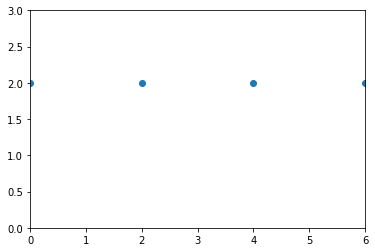

In [7]:
pt0 = (0,2)
pt1 = (2,2)
pt2 = (4,2)
pt3 = (6,2)
pts = [pt0,pt1,pt2,pt3]

xs = [p[0] for p in pts]
ys = [p[1] for p in pts]

plt.xlim(0,6)
plt.ylim(0,3)
plt.scatter(xs,ys)

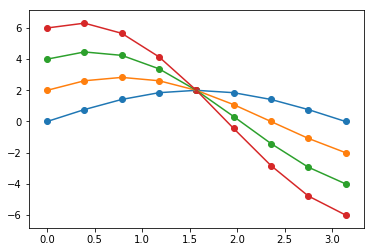

In [8]:

rhoVals = []
for p in pts:
    rhoVals = []
    for t in thetaVals:
        rhoVals.append(p[0]*math.cos(t) + p[1]*math.sin(t))
    #print(rhoVals)
    plot = plt.plot(thetaVals,rhoVals) 
    plot = plt.scatter(thetaVals,rhoVals) 

--- 
And this is what it looks like when we have *two dominant lines in an image.

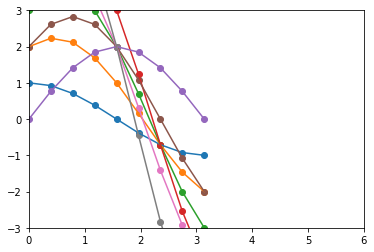

In [9]:
pt0 = (1,0)
pt1 = (2,1)
pt2 = (3,2)
pt3 = (4,3)
pt10 = (0,2)
pt11 = (2,2)
pt12 = (4,2)
pt13 = (6,2)
pts = [pt0,pt1,pt2,pt3,pt10,pt11,pt12,pt13]

plt.xlim(0,6)
plt.ylim(-3,3)
#plt.scatter(xs,ys)


rhoVals = []
for p in pts:
    rhoVals = []
    for t in thetaVals:
        rhoVals.append(p[0]*math.cos(t) + p[1]*math.sin(t))
    #print(rhoVals)
    plot = plt.plot(thetaVals,rhoVals) 
    plot = plt.scatter(thetaVals,rhoVals) 

## Part 1: The Hough Transform

Now that you understand how the Hough Transform works, try to replicate (by hand) the OpenCV Hough Transform function using an function signature.

The Hough Transform, as covered in class, is an algorithm where each non-zero pixel in an image (typically an edge-detected, thresholded image) "votes" for every line in might belong to.  In the above examples, we've discretized the angles that our lines could belong to into eight possible $\theta$ values, and then calculated $\rho$ for each point for each theta value.  In both examples above, all for points agree they belong to the same line.  

The Hough Transform, then, takes in a set of points, and returns a set of lines.  Following the [openCV API]( https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=houghlines), the Hough transform method should take the following form: 

lines = cv2.HoughLines(image, rho, theta, threshold)

That is, it should return an output vector of lines whose "votes" exceed the provided vote threshold.  Each line is represented by a two-element vector ($\rho$, $\theta$). Read the API to understand the units of the rho and theta arguments.






In [12]:
from project3 import *

monkey = cv2.imread("../images/project3/demo.pgm")
horz = cv2.imread("../images/project3/horz.pgm")
vert = cv2.imread("../images/project3/vert.pgm")
dots = cv2.imread("../images/project3/four-horiz-dots.pgm")
test_image = cv2.imread("../images/project3/testimage.pgm")

gaussian_blur_dots = Gaussian_Blur(dots)
sobel_edge_dots = Sobel_Edge(gaussian_blur_dots)
dot_dimensions = int(np.hypot(len(sobel_edge_dots[0]), len(sobel_edge_dots[0][0])))

gaussian_blur_test_image = Gaussian_Blur(test_image)
sobel_edge_test_image = Sobel_Edge(gaussian_blur_test_image)
test_image_dimensions = int(np.hypot(len(sobel_edge_test_image[0]), len(sobel_edge_test_image[0][0])))


lines = myHoughLines(sobel_edge_test_image, test_image_dimensions, np.pi/180, 5)
# plt.imshow(lines)
# plt.show()
cv2lines = cv2.HoughLines(sobel_edge_dots, dot_dimensions, np.pi/180, 5)

print(lines)


error: OpenCV(4.1.1) /io/opencv/modules/imgproc/src/hough.cpp:120: error: (-215:Assertion failed) img.type() == CV_8UC1 in function 'HoughLinesStandard'


Computer Vision Project 3A Writeup:

I have several functions to achieve my objective in project 3A. I have a function, Gaussian_Blur which is the Gaussian filter that blurs a given image. I also have made separate sobel edge detection functions that allow me to apply the detector on an image to determine the horizontal and vertical edges and I made a merge sobel edge function that merges the two functions together to get both. I decided to hard code the kernels because that’s the foundation of the function. Therefore no one is going to want/need to change those numbers. 

In [ ]:
monkey = cv2.imread("../images/project3/demo.pgm")
horz = cv2.imread("../images/project3/horz.pgm")
vert = cv2.imread("../images/project3/vert.pgm")
dots = cv2.imread("../images/project3/four-horiz-dots.pgm")
test_image = cv2.imread("../images/project3/testimage.pgm")

gaussian_blur_monkey = Gaussian_Blur(monkey)
gaussian_blur_horz = Gaussian_Blur(horz)
gaussian_blur_vert = Gaussian_Blur(vert)
gaussian_blur_test_image = Gaussian_Blur(test_image)

sobel_edge_monkey = Sobel_Edge(gaussian_blur_monkey)

# Running each kernel separately over the test image

plt.imshow(gaussian_blur_test_image)
plt.show()

sobel_edge_vert = Sobel_Edge_Vert(gaussian_blur_test_image)
sobel_edge_horz = Sobel_Edge_Horz(gaussian_blur_test_image)

plt.imshow(sobel_edge_vert)
plt.figure(figsize=(3,3))
plt.show()

plt.imshow(sobel_edge_horz)
plt.figure(figsize=(3,3))
plt.show()

# Combined x and y

sobel_edge_test_image = Sobel_Edge(gaussian_blur_test_image)

plt.imshow(sobel_edge_test_image)
plt.figure(figsize=(3,3))
plt.show()



I wrote my Hough Transform function to match the parameters that cv2’s function has: the image, rho, theta, and the threshold. I designed it so that the function will iterate through every individual pixel in order to calculate their corresponding rho values and these rho values are mapped to a theta value. The rho and theta values are added to a list and are retrieved by another function called finding_identical_lines where it adds those values to a dictionary as its key and the amount of times it sees the same values it adds one to the value of that corresponding key. This allows me to keep track of how many “votes” are being applied to the potential lines to determine if they are actual lines. Then every individual line of the new set of lines gets compared to the threshold value. If it’s greater than or equal to it, then it’s added to a new list called thresholdLines and these are returned by the function. (These lines are still a tuple of the rho value and the theta value). Thus my hough transform function works as it’s able to detect the lines that are created.  

In [ ]:
from project3 import *

monkey = cv2.imread("../images/project3/demo.pgm")
horz = cv2.imread("../images/project3/horz.pgm")
vert = cv2.imread("../images/project3/vert.pgm")
dots = cv2.imread("../images/project3/four-horiz-dots.pgm")
test_image = cv2.imread("../images/project3/testimage.pgm")

gaussian_blur_dots = Gaussian_Blur(dots)
sobel_edge_dots = Sobel_Edge(gaussian_blur_dots)
dot_dimensions = int(np.hypot(len(sobel_edge_dots[0]), len(sobel_edge_dots[0][0])))

gaussian_blur_test_image = Gaussian_Blur(test_image)
sobel_edge_test_image = Sobel_Edge(gaussian_blur_test_image)
test_image_dimensions = int(np.hypot(len(sobel_edge_test_image[0]), len(sobel_edge_test_image[0][0])))


lines_dots = myHoughLines(sobel_edge_dots, dot_dimensions, np.pi/180, 5)

lines_test_image = myHoughLines(sobel_edge_test_image, test_image_dimensions, np.pi/180, 5)

This project was very interesting. I got very frustrated many times because I wasn’t sure how to properly find the common lines. I really struggled with finding a method that had a fast runtime of counting up the number of lines that appeared, but as you can tell, I eventually was able to get it. 
